<a href="https://colab.research.google.com/github/AndersonAraujoX/Rede_Complexa/blob/main/Rede_complexas_T3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Relatório do Artigo do Luciano 

Nome: Anderson Araujo de Oliveira

N USP° 11371311

# Bibliotecas Utilizadas

In [ ]:
!pip install algorithmx

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 25.7 MB/s eta 0:00:00


In [ ]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import math as math
import matplotlib.pyplot as plt
import random as random
from algorithmx import jupyter_canvas
from google.colab import output
from networkx.algorithms.community.centrality import girvan_newman
from sklearn.decomposition import PCA
from scipy.linalg import eigh

output.enable_custom_widget_manager()

# Grafos utilizados

- Strogatz-Watt

O modelo de Watts-Strogatz é um modelo aleatório de geração de grafos que produz grafos com propriedades de pequeno mundo, incluindo comprimentos de trajeto médios curtos e alta clustering.

- Erdos-Renyis

O modelo Erdõs-Rényi é um dos dois modelos estritamente relacionados para gerar grafos aleatórios, que inclui o limite entre cada par de nós com igual probabilidade, independentemente das extremidades.

- Barabasi-Albert

O modelo de Barabási–Albert (BA) é um algoritmo para gerar redes sem escala de forma aleatória: a rede cresce através da inclusão de novos nós no decorrer do tempo, e esses novos nós se ligam aos nós já existentes na rede com probabilidade proporcional ao grau.

- Karate Club

O Karate Club é uma biblioteca de extensão de aprendizado de máquina não supervisionada para NetworkX.

In [ ]:
Sw=nx.watts_strogatz_graph(50,5,0)
Er=nx.erdos_renyi_graph(50,0.1)
Ba=nx.barabasi_albert_graph(50,3)
Kc=nx.karate_club_graph()

In [ ]:
canvas = jupyter_canvas()

canvas.nodes(Sw.nodes).add(color="orange")
canvas.edges(Sw.edges).add()

canvas

JupyterWidget(events=['{"attrs": {"nodes": {"0": {"color": "orange"}, "1": {"color": "orange"}, "2": {"color":…

In [ ]:
canvas = jupyter_canvas()

canvas.nodes(Er.nodes).add(color="red")
canvas.edges(Er.edges).add()

canvas

JupyterWidget(events=['{"attrs": {"nodes": {"0": {"color": "red"}, "1": {"color": "red"}, "2": {"color": "red"…

In [ ]:
canvas = jupyter_canvas()

canvas.nodes(Ba.nodes).add(color="blue")
canvas.edges(Ba.edges).add()

canvas

JupyterWidget(events=['{"attrs": {"nodes": {"0": {"color": "blue"}, "1": {"color": "blue"}, "2": {"color": "bl…

In [ ]:
canvas = jupyter_canvas()

canvas.nodes(Kc.nodes).add(color="black")
canvas.edges(Kc.edges).add()

canvas

JupyterWidget(events=['{"attrs": {"nodes": {"0": {"color": "black"}, "1": {"color": "black"}, "2": {"color": "…

Vulnerabilidade!

Em redes de infra-estrutura (como WWW, Internet, fornecimento de energia, etc), é importante saber quais componentes são cruciais para o funcionamento ideal. Intuitivamente, os vértices críticos de uma rede são os seus hubs, porém há situações em que eles não são necessariamente os mais vitais para o desempenho do sistema ao qual a rede está subjacente. Por exemplo, todos os vértices de uma rede na forma de uma árvore binária têm o mesmo grau, portanto não há hub, mas a desconexão dos vértices mais próximos da raiz e da própria raiz tem um impacto maior do que aqueles próximos às folhas. Isso sugere que as redes têm uma propriedade hierárquica, o que significa que os componentes mais cruciais são aqueles em posições mais altas na hierarquia.

onde $E$ é a eficiência global da rede original e $E_{i}$ é a eficiência global
após a remoção do vértice i e todas as suas arestas.

$V_{i}=\frac{E-E_i}{E}$

In [ ]:
def vulnerability(vec):
  result=[]
  #norm=nx.global_efficiency(vec[0])
  for i in vec:
      vet=[]

      for u, v in i.edges():
          a=nx.efficiency(i,u,v)
          #print(a)
          vet.append(a)
      result.append(max(vet))
  return result

In [ ]:
def vulnerability(G):
  vet=[]
  norm=nx.global_efficiency(G)
  for u in G.nodes():
      Aux = nx.Graph() # or whatever type of graph `G` is
      Aux.add_edges_from(G.edges())
      Aux.remove_node(u)
      a=(norm-nx.global_efficiency(Aux))/norm
      vet.append(a)
  #print(vet)
  return max(vet)


In [ ]:
G = nx.karate_club_graph()
Sw=nx.watts_strogatz_graph(50,5,0.1)
Er=nx.erdos_renyi_graph(50,0.2)
Ba=nx.barabasi_albert_graph(50,3)
#Vulnetrebildidade de cada grafo
print('Vulnerabilidade Karate Club:',vulnerability(G))
print('Vulnerabilidade Watts Strogatz:',vulnerability(Sw))
print('Vulnerabilidade Erdos Renyi:',vulnerability(Er))
print('Vulnerabilidade Barabasi Albert:',vulnerability(Ba))

Vulnerabilidade Karate Club: 0.27143590362900766
Vulnerabilidade Watts Strogatz: 0.028106369222675082
Vulnerabilidade Erdos Renyi: 0.008823529411768085
Vulnerabilidade Barabasi Albert: 0.050489168413689764


Coeficiente Cíclico

Um coeficiente para medir o quão cíclica é uma rede. O coeficiente cíclico local de um vértice i é definido como a média do inverso dos tamanhos dos menores ciclos formados pelo vértice i e seus vizinhos,

$a_{ij}$= elemento da matriz adjacente.

$S_{ijk}$= igual ao menor circulo que passa por i,j e k

O coeficiente dado por cada vertice é:

$\theta_{i}=\frac{2}{k_{i}(k_{i}-1)}\sum_{k>j}\frac{a_{ij}a_{ik}}{S_{ijk}}$

Mas estamos calculando a média.

$<\theta>=\frac{1}{N}\sum_i\theta_{i}$


In [ ]:
def cyclic_coefficient(G):
    cyclic_coeffs = []
    for i in G.nodes():
        if G.degree(i) >= 2:
            neighbors = list(G.neighbors(i))
            n = len(neighbors)
            s = 0
            for j in range(n):
                for k in range(j+1, n):
                    if G.has_edge(neighbors[j], neighbors[k]):
                        Sijk = 3
                    else:
                        try:
                            Sijk = nx.shortest_path_length(G, source=neighbors[j], target=neighbors[k])
                        except:
                            Sijk = float('inf')
                    s += 1/Sijk
            cyclic_coeffs.append(s/(n*(n-1)))
    return sum(cyclic_coeffs)/len(cyclic_coeffs)



In [ ]:
# Cria um grafo de exemplo
G = nx.karate_club_graph()
Sw=nx.watts_strogatz_graph(50,10,0)
Er=nx.erdos_renyi_graph(50,1)
Ba=nx.barabasi_albert_graph(50,3)

print('Coeficiente Ciclico do Karate Club:',cyclic_coefficient(G))
print('Coeficiente Ciclico Watts Strogatz:',cyclic_coefficient(Sw))
print('Coeficiente Ciclico Erdos Renyi:',cyclic_coefficient(Er))
print('Coeficiente Ciclico Barabasi Albert:',cyclic_coefficient(Ba))

Coeficiente Ciclico do Karate Club: 0.20100578722459292
Coeficiente Ciclico Watts Strogatz: 0.19444444444444456
Coeficiente Ciclico Erdos Renyi: 0.16666666666666446
Coeficiente Ciclico Barabasi Albert: 0.22777880744986


Coeficiente de rich-club

Esse coeficiente é relacionado ciência, influência de pesquisa de cada area coloborativo e paper publicados.

ℜ(k) são os conjutos dos vertices com maiores quantidades de k de graus. 

$\phi(k)=\frac{1}{|ℜ(k)|(|ℜ(k)|-1)}\sum_{i,j \in ℜ(k)}a_{ij}$

In [ ]:
def rich_club(G,threshold = 5):
  rc = nx.rich_club_coefficient(G, normalized=False)
  return {k: v for k, v in rc.items() if G.degree(k) > threshold}


In [ ]:
G = nx.karate_club_graph()
# Define o limiar de riqueza
rc_filtered = rich_club(G,threshold = 5)
print("Rich Club:")
Sw=nx.watts_strogatz_graph(50,5,0.6)
for k, v in rc_filtered.items():
    print(f"  Nodo {k}: {v}")

Sw=nx.watts_strogatz_graph(100,4,0.7)

print("Small World:")

rc_filtered = rich_club(Sw,threshold = 5)
for k, v in rc_filtered.items():
    print(f"  Nodo {k}: {v}")

canvas = jupyter_canvas()

canvas.nodes(G.nodes).add(color="orange")
canvas.edges(G.edges).add()

canvas

Rich Club:
  Nodo 0: 0.13903743315508021
  Nodo 1: 0.14583333333333334
  Nodo 2: 0.23809523809523808
  Nodo 3: 0.325
Small World:
  Nodo 0: 0.04040404040404041
  Nodo 4: 0.06666666666666667


JupyterWidget(events=['{"attrs": {"nodes": {"0": {"color": "orange"}, "1": {"color": "orange"}, "2": {"color":…

# Distribuição de graus e correlações


Assortatividade é uma métrica utilizada para quantificar a tendência de nós individuais se conectarem a outros nós semelhantes um grafo




Correlação: -0.4756130976846144
Correlação: -0.015873015873015872


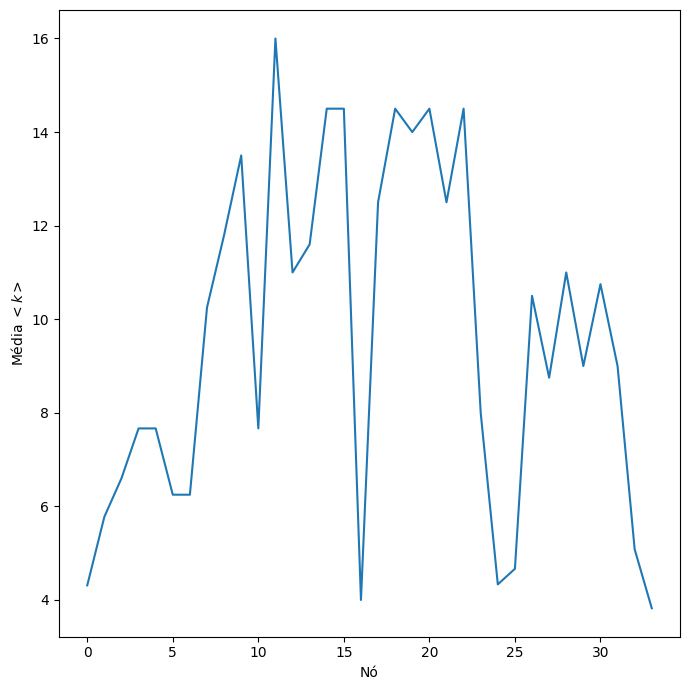

In [ ]:

G = nx.karate_club_graph()

print(f"Correlação: {nx.degree_pearson_correlation_coefficient(G)}")

G = nx.watts_strogatz_graph(8,4,0.1)

print(f"Correlação: {nx.degree_pearson_correlation_coefficient(G)}")

G = nx.Graph()

G.add_nodes_from([1, 2, 3, 4, 5])

for i in range(1, 6):
    for j in range(i+1, 6):
        G.add_edge(i, j)

G = nx.karate_club_graph()

#average degree
#print()
u=np.array(list(nx.average_neighbor_degree(G).items())).T
plt.plot(u[:][0],u[:][1])
plt.ylabel('Média $<k>$')
plt.xlabel('Nó')
plt.show()
#for u, v in nx.average_neighbor_degree(G).items():
  #u

## Graus de bipartividade

Os graus de bipartividade medem a "bipartitividade" de um nó em um grafo bipartido. Em outras palavras, eles medem o quão bem conectado um nó de uma partição está com os nós da outra partição.

O cálculo dos graus de bipartividade pode ser útil para entender como os nós de diferentes partições estão conectados em um grafo bipartido e para identificar quais nós podem ser importantes para manter a conectividade entre as duas partições.

### Novo Grafo, Bipartido

In [ ]:
G = nx.Graph()
G.add_nodes_from(['A', 'B', 'C', 'D', 'E'], bipartite=0)
G.add_nodes_from([1, 2, 3, 4], bipartite=1)
G.add_edges_from([('A', 1), ('A', 2), ('B', 2), ('C', 2), ('C', 3), ('D', 3), ('D', 4), ('E', 4)])
canvas = jupyter_canvas()

canvas.nodes(G.nodes).add(color="orange")
canvas.edges(G.edges).add()

canvas

JupyterWidget(events=['{"attrs": {"nodes": {"A": {"color": "orange"}, "B": {"color": "orange"}, "C": {"color":…

In [ ]:
# Criando um grafo bipartido
G = nx.Graph()
G.add_nodes_from(['A', 'B', 'C', 'D', 'E'], bipartite=0)
G.add_nodes_from([1, 2, 3, 4], bipartite=1)
G.add_edges_from([('A', 1), ('A', 2), ('B', 2), ('C', 2), ('C', 3), ('D', 3), ('D', 4), ('E', 4)])

bipartivity = nx.algorithms.bipartite.spectral_bipartivity(G)

print("Grau de bipartividade grafo bipartido")


#for node in G.nodes:
print(f"{bipartivity}")

G = nx.karate_club_graph()

bipartivity = nx.algorithms.bipartite.spectral_bipartivity(G)

print("Grau de bipartividade Karater club")
#for node in G.nodes:
print(f"{bipartivity}")


Grau de bipartividade grafo bipartido
1.0
Grau de bipartividade Karater club
0.5001316717352706


 ## informações de pesquisa, entropia de estrada e entropia de saida

 A estrutura de uma rede complexa está relacionada à sua confiabilidade e velocidade de propagação da informação. A dificuldade na busca de informações na rede pode ser quantificada através da entropia de informação da rede.

In [ ]:
def shortest_path_probability(G, i, b):
    #print(list(nx.all_shortest_paths(G, source=i, target=b)))
    paths = list(nx.all_shortest_paths(G, source=i, target=b))
    neighbors = list(G.neighbors(i))
    ki = len(neighbors)
    soma_prob=0
    for path in paths:
      probability = 1.0 / ki
      for j in path:
          neighbors = list(G.neighbors(j))
          k = len(neighbors)
          if j != b:
            probability *= 1.0 / (k - 1)
      soma_prob+=probability
    return soma_prob


In [ ]:
def entropy_A(G,i):
  S=0
  u=G.nodes()
  for j in u:
      S+=entropy(G,i,j)
  return  S/len(u)

In [ ]:
def entropy_H(G,i):
  S=0
  u=G.nodes()
  for j in u:
      S+=entropy(G,j,i)
  return  S/len(u)

In [ ]:
def entropy(G, i, b):
    return -math.log2(shortest_path_probability(G,i,b))


In [ ]:
def entropy_total(G):
  S=0
  u=G.nodes()
  for i in u:
    for j in u:
      S+=entropy(G,i,j)
  return S/len(u)**2


entropia total do sistema 3.4305477577778407



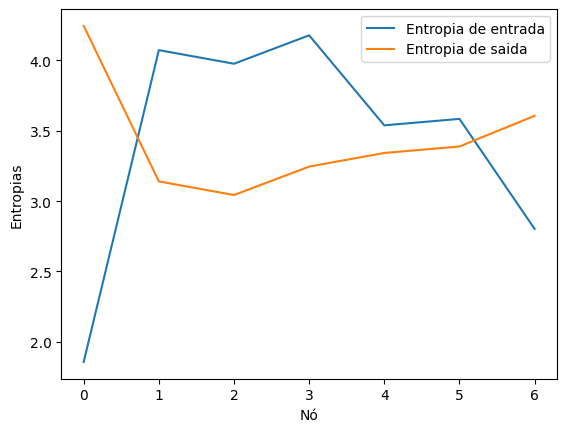

In [ ]:
G = nx.watts_strogatz_graph(7,4,0.4)
#G.add_edges_from([(1, 2), (1, 3), (2, 3), (3, 4), (3, 5)])
matriz_entropy=np.empty((len(G.nodes()),len(G.nodes())))
print(f'entropia total do sistema {entropy_total(G)}\n')
E_A=[]
E_H=[]
#calculando a entropia da entrada e saida
for u in G.nodes():
  E_A.append(entropy_A(G,u))
  E_H.append(entropy_H(G,u))
u=G.nodes()
#plot do grafico
plt.plot(u,E_A,label='Entropia de entrada')
plt.plot(u,E_H,label='Entropia de saida')
plt.legend()
plt.ylabel('Entropias')
plt.xlabel('Nó')
plt.show()

# Espectro da matriz de adjacência

O espectro de uma rede corresponde ao conjunto de autovalores i de sua matriz de adjacência A.

Os autovalores e autovetores associados de uma rede estão relacionados ao diâmetro, ao número de ciclos e às propriedades de conectividade da rede.

Autovalores da matriz de adjacência:
1° momento -1.301736496372996e-15
2° momento 7.099999999999996
3° momento 22.199999999999925
4° momento 254.09999999999945


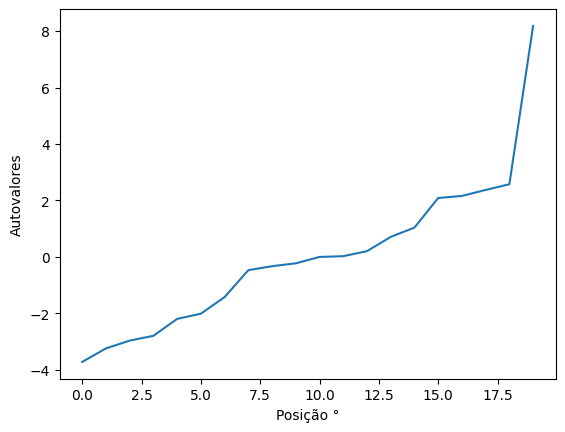

In [ ]:
G = nx.erdos_renyi_graph(20, 0.3)

adj_matrix = nx.to_numpy_array(G)

# Calcula os autovalores da matriz de adjacência
eigenvalues = np.linalg.eigvals(adj_matrix)

print("Autovalores da matriz de adjacência:")
plt.plot(range(len(eigenvalues)),sorted(eigenvalues))
plt.ylabel('Autovalores')
plt.xlabel('Posição °')

print(f'1° momento {np.sum(eigenvalues)/len(eigenvalues)}')
print(f'2° momento {np.sum(eigenvalues**2)/len(eigenvalues)}')
print(f'3° momento {np.sum(eigenvalues**3)/len(eigenvalues)}')
print(f'4° momento {np.sum(eigenvalues**4)/len(eigenvalues)}')
plt.show()



# Metodo de divisivos 

## 1° primeiro metodo Centralidade de intermediação

O método divisivo mais popular é o algoritmo de GirvanNewman. Como diferentes comunidades estão conectadas por um pequeno número de arestas, este método considera que os gargalos são formados nas arestas que conectam comunidades, por onde devem passar todos os caminhos mais curtos. Em ordem para medir essa propriedade relacionada ao tráfego nas redes, o algoritmo usa o conceito de limite intermediário.

In [ ]:
G = nx.karate_club_graph()

# Executa o algoritmo de Girvan-Newman
comp = girvan_newman(G)

communities = tuple(sorted(c) for c in next(comp))
print("Comunidades encontradas:")
print(communities)

#grafo bipartido
G = nx.Graph()
G.add_nodes_from([5, 6, 7, 8, 9], bipartite=0)
G.add_nodes_from([1, 2, 3, 4], bipartite=1)
G.add_edges_from([(5, 1), (5, 2), (6, 2), (7, 2), (7, 3), (8, 3), (8, 4), (9, 4)])

comp = girvan_newman(G)

communities = tuple(sorted(c) for c in next(comp))

print("Comunidades encontradas:")
print(communities)

Comunidades encontradas:
([0, 1, 3, 4, 5, 6, 7, 10, 11, 12, 13, 16, 17, 19, 21], [2, 8, 9, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33])
Comunidades encontradas:
([1, 2, 5, 6], [3, 4, 7, 8, 9])


# Coeficiente de agrupamento de borda

 O algoritmo é semelhante ao método de Girvan e Newman, mas em vez da centralidade de intermediação, ele calcula o coeficiente de agrupamento de arestas.

Essa medida se baseia no fato de que as arestas que conectam as comunidades tendem a apresentar um valor pequeno para esse coeficiente.

In [ ]:
def triangulos(graph, node1, node2):
    nodes = [node1, node2]
    subgraph = graph.subgraph(nodes)
    triangles = nx.triangles(subgraph)
    shared_triangles = sum(triangles.values()) - 2*triangles[node1] - 2*triangles[node2] + 4*len(subgraph.edges())
    return shared_triangles

In [ ]:
def edge_clustering(G,i,j):
  b=G.degree(j)
  a=G.degree(i)
  if a>b:
    return (triangulos(G,i,j)+1)/b
  return (triangulos(G,i,j)+1)/a

In [ ]:
G = nx.karate_club_graph()
for i in G.nodes():
  for j in G.nodes():
    print(f'Para os nós {i} e {j} o Coeficiente de agrupamento de borda: {edge_clustering(G,i,j)}')

Para os nós 0 e 0 o Coeficiente de agrupamento de borda: 0.0625
Para os nós 0 e 1 o Coeficiente de agrupamento de borda: 0.5555555555555556
Para os nós 0 e 2 o Coeficiente de agrupamento de borda: 0.5
Para os nós 0 e 3 o Coeficiente de agrupamento de borda: 0.8333333333333334
Para os nós 0 e 4 o Coeficiente de agrupamento de borda: 1.6666666666666667
Para os nós 0 e 5 o Coeficiente de agrupamento de borda: 1.25
Para os nós 0 e 6 o Coeficiente de agrupamento de borda: 1.25
Para os nós 0 e 7 o Coeficiente de agrupamento de borda: 1.25
Para os nós 0 e 8 o Coeficiente de agrupamento de borda: 1.0
Para os nós 0 e 9 o Coeficiente de agrupamento de borda: 0.5
Para os nós 0 e 10 o Coeficiente de agrupamento de borda: 1.6666666666666667
Para os nós 0 e 11 o Coeficiente de agrupamento de borda: 5.0
Para os nós 0 e 12 o Coeficiente de agrupamento de borda: 2.5
Para os nós 0 e 13 o Coeficiente de agrupamento de borda: 1.0
Para os nós 0 e 14 o Coeficiente de agrupamento de borda: 0.5
Para os nós 0 

## Maximização da modularidade

Newman propos um metodo base em juntar as comunidades de tal forma que  modularidade chegasse no máximo.


$\Delta Q_{ij} = 2 (e_{ij}-\frac{\sum_{j}e_{ij}\sum_{i}e_{ij}}{2M})$



In [ ]:

G = nx.karate_club_graph()
c = nx.community.greedy_modularity_communities(G)
for i in sorted(c):
  print(i)
G = nx.Graph()

frozenset({8, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33})
frozenset({1, 2, 3, 7, 9, 12, 13, 17, 21})
frozenset({0, 16, 19, 4, 5, 6, 10, 11})


## Metodo de seleção
 
Apesar dos muitos métodos alternativos interessantes, incluindo aqueles brevemente revisados acima, deve-se notar que o problema de encontrar comunidades continua sendo um desafio porque nenhum método único é rápido e sensível o suficiente para garantir resultados ideais para grandes redes gerais, um problema que é agravado pela falta de uma definição clara de comunidades. Se as comunidades devem ser identificadas com alta precisão, o método espectral proposto por Newman é uma boa escolha. No entanto, se a prioridade for atribuída à velocidade, métodos como os que usam algoritmos gulosos devem ser considerados. Em resumo, a escolha do melhor método a ser utilizado depende da configuração do problema e do tipo de resultado desejado. Um fato que deve ter ficado claro em nossa breve revisão das abordagens de localização de comunidades é a importância essencial da escolha das medidas adotadas para expressar a separação das comunidades. Na verdade, tais medições representam, em última análise, uma definição objetiva de comunidades. Portanto, uma perspectiva interessante para novas pesquisas seria considerar a possível adaptação e combinação de algumas das medições relatadas neste levantamento com o objetivo específico de caracterização da comunidade.

## Subgrafos e motivos em redes ponderadas

Em redes ponderadas, um subgrafo pode estar presente com valores diferentes para os pesos das arestas. Sugeriram uma definição para a intensidade de um subgrafo baseada na média geométrica de seus pesos na rede.

In [ ]:
def I_g(G):
  w=nx.to_numpy_array(G)
  I=1
  for i in range(len(w[0])):
    for j in range(len(w)):
      if w[i][j]>0.0:
        I*=w[i][j]
  return I**(1/G.number_of_edges())

In [ ]:
def psi(G,I):
  a=nx.to_numpy_array(G)
  return  I*Aux.number_of_edges()/np.sum(a)

In [ ]:
G = nx.karate_club_graph()

Aux=G.subgraph([8, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33])

I=I_g(Aux)

ps=psi(Aux,I)

print('Intensidade',I)

print('Coerencia',ps)



Aux=G.subgraph([0, 1, 3, 4, 5, 6, 7, 10, 11, 12, 13, 16, 17, 19, 21])

I=I_g(Aux)

ps=psi(Aux,I)

print('Intensidade',I)

print('Coerencia',ps)

canvas = jupyter_canvas()

canvas.nodes(Aux.nodes).add(color="orange")
canvas.edges(Aux.edges).add()

canvas

Intensidade 8.547228658954273
Coerencia 1.3453971037242838
Intensidade 6.83911368628558
Coerencia 1.2275332257435656


JupyterWidget(events=['{"attrs": {"nodes": {"0": {"color": "orange"}, "1": {"color": "orange"}, "3": {"color":…

## Coeficiente médio de agrupamento e coeficiente médio de agrupamento hierárquico de segundo nível.

O coeficiente de agrupamento hierárquico de segundo nível mede a probabilidade de que os vizinhos dos vizinhos de um vértice em um grafo estejam conectados entre si. 


 O coeficiente de agrupamento hierárquico de segundo nível é a média dessas médias para todos os vértices do grafo. Esse coeficiente é uma medida de como as conexões entre os vizinhos de um vértice se propagam para além do primeiro nível de vizinhos.

In [ ]:
def clustering_coefficient_2d(G):

    G1 = nx.Graph()
    for i in G.nodes():
        for j in G.neighbors(i):
            for k in G.neighbors(i):
                if j != k and j < k and k in G.neighbors(j):
                    G1.add_edge(j, k)
    N = len(G1.nodes())
    num = 0
    den = 0
    for i in G1.nodes():
        for j in G1.neighbors(i):
            for k in G1.neighbors(i):
                if j != k and j < k:
                    if G.has_edge(i, j) and G.has_edge(i, k) and G.has_edge(j, k):
                        num += 1
                    if G.has_edge(i, j) and G.has_edge(i, k):
                        den += 1
                        
    if den == 0:
        return 0
    else:
        return (1/N) * (num / den)


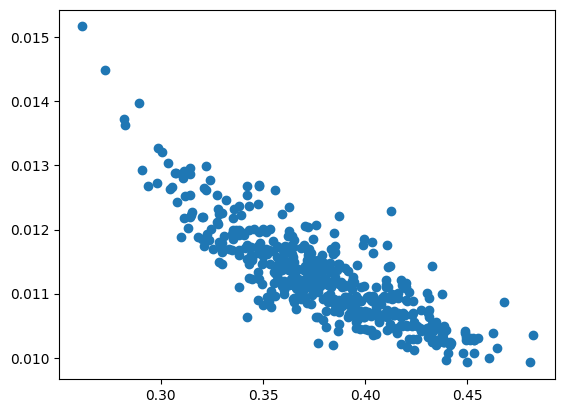

In [ ]:
avg_clu=[]
clu_2d=[]
for i in range(500):
  G = nx.watts_strogatz_graph(50,5,0.1)
  
  clustering_coefficients = nx.clustering(G)
  avg_clustering_coefficient = sum(clustering_coefficients.values()) / len(clustering_coefficients)

  avg_clu.append(avg_clustering_coefficient)
  clu_2d.append(clustering_coefficient_2d(G))

plt.scatter(avg_clu,clu_2d)
plt.show()

CVA ou CCA

É uma técnica de análise de regressão que envolve a criação de novas variáveis, conhecidas como variáveis canônicas, que são combinações lineares das variáveis originais. A ideia é criar novas variáveis que capturem a maior quantidade possível de variação nas variáveis originais e que estejam altamente correlacionadas entre si.

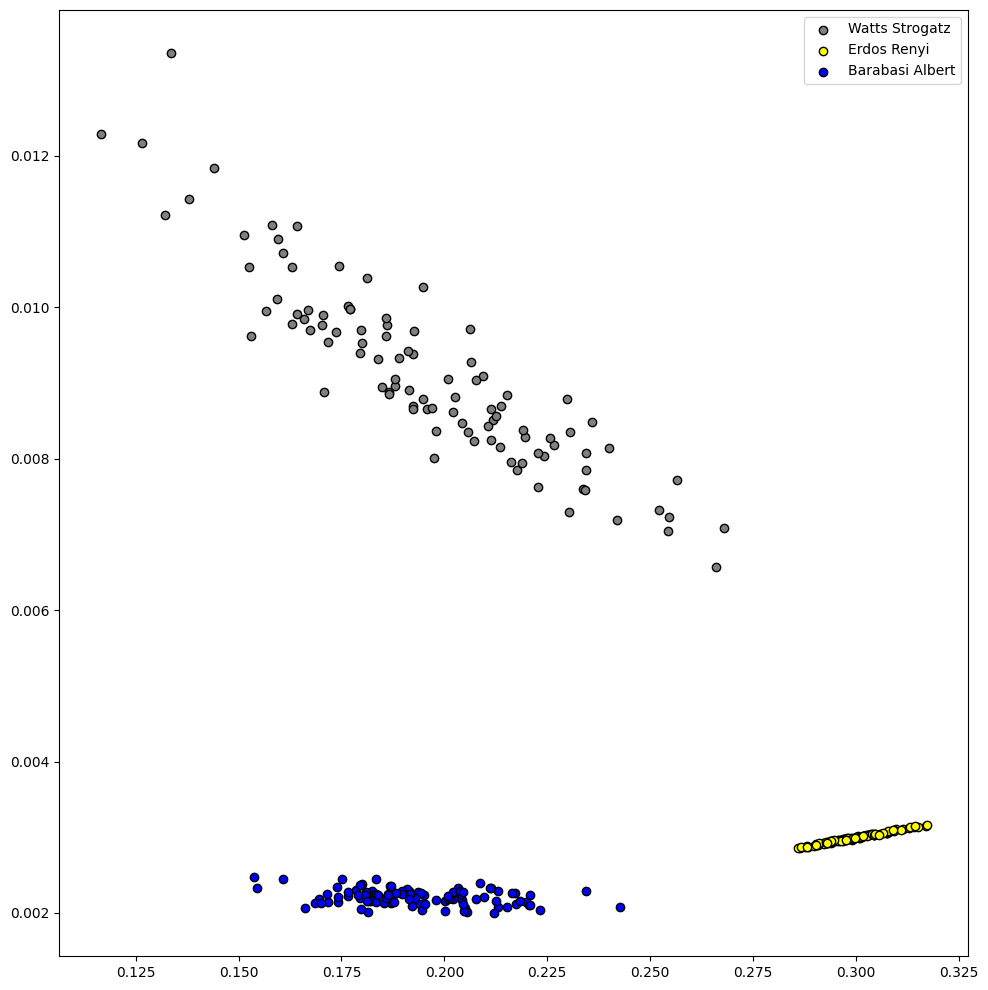

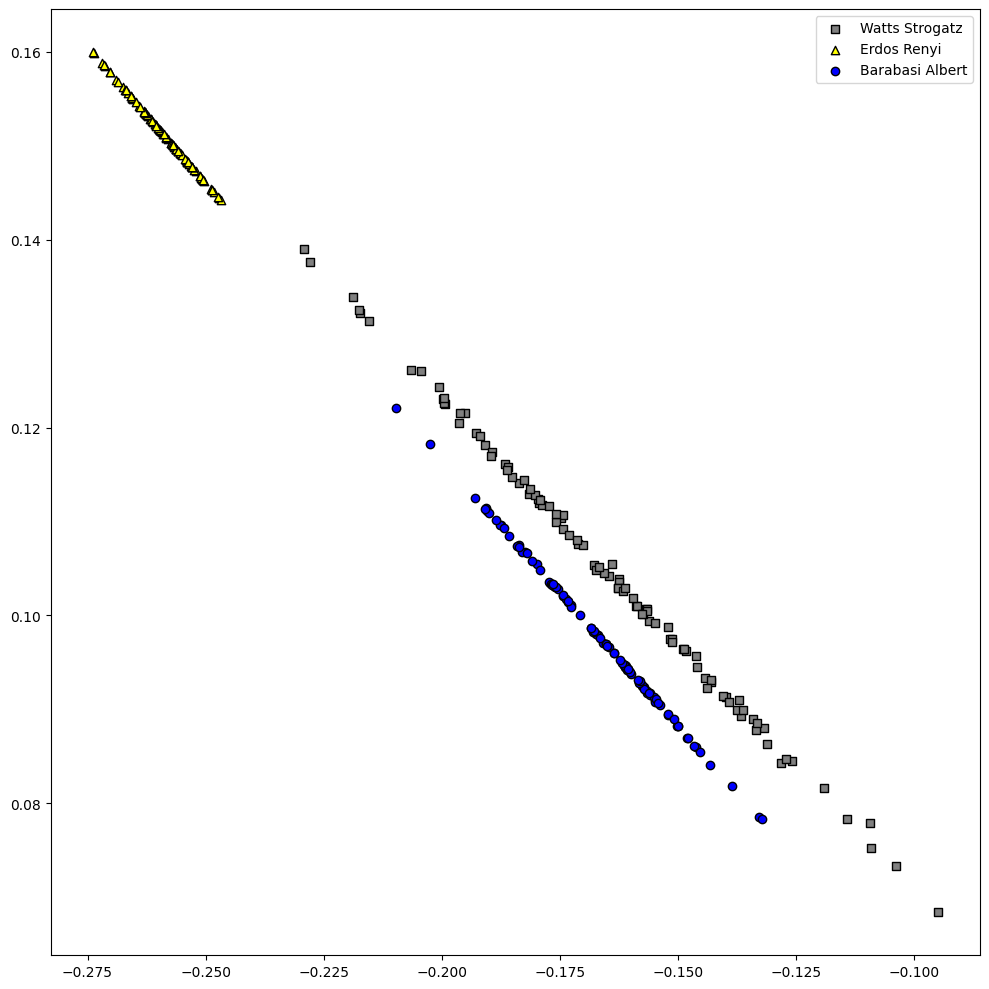

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
n=100

x1=[]
y1=[]
x2=[]
y2=[]
x3=[]
y3=[]
classes=[]

for i in range(n):
  # grafos 
  Sw=nx.watts_strogatz_graph(100,5,0.3)
  Er=nx.erdos_renyi_graph(100,0.3)
  Ba=nx.barabasi_albert_graph(100,5)
  # grafos Watts Strogatz
  clustering_coefficients = nx.clustering(Sw)
  avg_clustering_coefficient = sum(clustering_coefficients.values()) / len(clustering_coefficients)
  x1.append(avg_clustering_coefficient)
  y1.append(clustering_coefficient_2d(Sw))
  classes.append(0)
  # grafos Er
  clustering_coefficients = nx.clustering(Er)
  avg_clustering_coefficient = sum(clustering_coefficients.values()) / len(clustering_coefficients)
  x2.append(avg_clustering_coefficient)
  y2.append(clustering_coefficient_2d(Er))
  classes.append(1)
  # grafos Ba
  clustering_coefficients = nx.clustering(Ba)
  avg_clustering_coefficient = sum(clustering_coefficients.values()) / len(clustering_coefficients)
  x3.append(avg_clustering_coefficient)
  y3.append(clustering_coefficient_2d(Ba))
  classes.append(2)

fig = plt.figure(figsize=(10,10))
ax0 = fig.add_subplot(111)

ax0.scatter(x1,y1,label='Watts Strogatz',c='grey',edgecolor='black')
ax0.scatter(x2,y2,label='Erdos Renyi',c='yellow',edgecolor='black')
ax0.scatter(x3,y3,label='Barabasi Albert',c='blue',edgecolor='black')
ax0.legend()
plt.show()

# Calculate the mean vectors per class
z1=[x1,y1]
z2=[x2,y2]
z3=[x3,y3]

d=2
mena=np.array([x1+x2+x3,y1+y2+y3])
mean_overall = np.mean(mena, axis=1)
S_B = np.zeros((d, d))

mean_rectangles = np.mean(z1,axis=1).reshape(2,1) # Creates a 2x1 vector consisting of the means of the dimensions 
mean_triangles = np.mean(z2,axis=1).reshape(2,1)
mean_circles = np.mean(z3,axis=1).reshape(2,1)

mean_vec=[mean_rectangles,mean_triangles,mean_circles ]

for i, mean_vec in enumerate(mean_vec):
    mean_vec = mean_vec.reshape(d, 1)
    mean_overall = mean_overall.reshape(d, 1)
    S_B += n * (mean_vec - mean_overall).dot((mean_vec - mean_overall).T)
#print('Between-class scatter matrix: %sx%s' % (S_B.shape[0], S_B.shape[1]))


mean_rectangles = np.mean(z1,axis=1).reshape(2,1) # Creates a 2x1 vector consisting of the means of the dimensions 
mean_triangles = np.mean(z2,axis=1).reshape(2,1)
mean_circles = np.mean(z3,axis=1).reshape(2,1)

# Calculate the scatter matrices for the SW (Scatter within) and sum the elements up

scatter_rectangles = np.dot((z1-mean_rectangles),(z1-mean_rectangles).T)
scatter_triangles = np.dot((z2-mean_triangles),(z2-mean_triangles).T)
scatter_circles = np.dot((z3-mean_circles),(z3-mean_circles).T)

# Calculate the SW by adding the scatters within classes 
SW = scatter_triangles+scatter_circles+scatter_rectangles

eigen_vals, eigen_vecs = np.linalg.eigh(np.linalg.inv(SW).dot(S_B))

z1_trans = np.dot(eigen_vecs,np.array(z1))
z2_trans = np.dot(eigen_vecs,np.array(z2))
z3_trans = np.dot(eigen_vecs,np.array(z3))


fig = plt.figure(figsize=(10,10))
ax0 = fig.add_subplot(111)
ax0.scatter(z1_trans[0],z1_trans[1],marker='s',label='Watts Strogatz',c='grey',edgecolor='black')
ax0.scatter(z2_trans[0],z2_trans[1],marker='^',label='Erdos Renyi',c='yellow',edgecolor='black')
ax0.scatter(z3_trans[0],z3_trans[1],marker='o',label='Barabasi Albert',c='blue',edgecolor='black')
ax0.legend()
plt.show()




# Grau hierárquico médio de segundo nível

Também conhecido como HD2, é uma medida de centralidade em redes que tenta capturar a importância dos nós em diferentes níveis hierárquicos na rede

In [ ]:
def HDR2(G):
  hd2 = {}
  for node in G.nodes():
      hd2[node] = sum([G.degree(neighbor) for neighbor in G.neighbors(node)]) - 2 * G.degree(node)
  mean=0
  for node, value in hd2.items():
      mean+=value
  return mean/len(hd2.items())

# razão de divergência hierárquica média do terceiro nível

Medida de centralidade em grafos que considera a diversidade dos caminhos mais curtos que passam por um nó.





In [ ]:
def HDR3(G): 
  root = max(dict(G.degree()).items(), key=lambda x: x[1])[0]
  shortest_paths = nx.single_source_shortest_path(G, root)
  predecessors = {}
  for node in G.nodes():
      pred = []
      for path in shortest_paths.values():
          if node in path and path.index(node) > 0:
              pred.append(path[path.index(node)-1])
      predecessors[node] = pred
  hdr3 = {}
  for node in G.nodes():
      hdr = 1
      for pred in predecessors[node]:
          hdr *= nx.degree(G, pred)
      hdr3[node] = hdr
  #print("HDR3:")
  mean = 0
  for node, hdr in hdr3.items():
      mean+=hdr
      #print(f"{node}: {hdr}")
  return mean/len(hdr3.items())

## Métodos estatísticos multivariados para redução de dimensionalidade e seleção de medição

PCA
 
O objetivo é encontrar um conjunto menor de variáveis, chamados componentes principais, que resumem as informações contidas no conjunto original de variáveis.

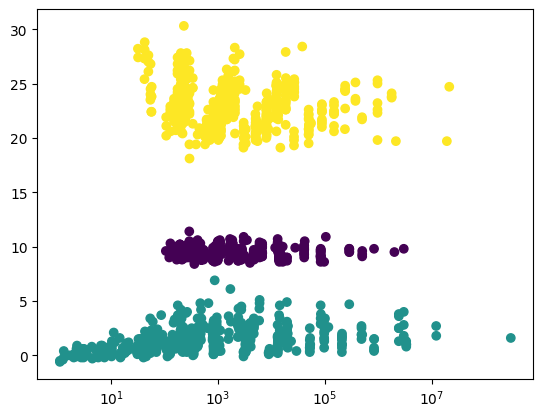

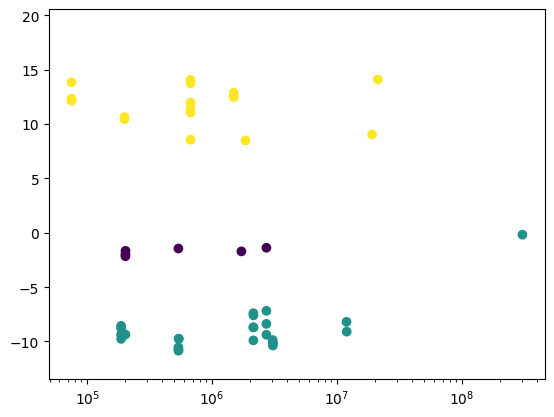

JupyterWidget(events=['{"attrs": {"nodes": {"0": {"color": "orange"}, "1": {"color": "orange"}, "2": {"color":…

In [ ]:
HD2=[]
HD3=[]
classes=[]
for i in range(500):
  G = nx.watts_strogatz_graph(20,5,0.5)
  Er=nx.erdos_renyi_graph(20,0.1)
  Ba=nx.barabasi_albert_graph(20,3)
  classes.append(0)
  HD3.append(HDR3(G))
  HD2.append(HDR2(G))
  classes.append(1)
  HD3.append(HDR3(Er))
  HD2.append(HDR2(Er))
  classes.append(2)
  HD3.append(HDR3(Ba))
  HD2.append(HDR2(Ba))


plt.scatter(HD3,HD2,c=classes)
plt.xscale('log')
plt.show()

# Cria um grafo aleatório
G = nx.erdos_renyi_graph(50, 0.1)
data=list(zip(HD3,HD2))
pca = PCA(n_components=2)
components = pca.fit_transform(data)
# Plota os componentes principais
import matplotlib.pyplot as plt
plt.scatter(components[:,0], components[:,1],c=classes)
plt.xscale('log')
plt.show()


canvas = jupyter_canvas()

canvas.nodes(G.nodes).add(color="orange")
canvas.edges(G.edges).add()

canvas  


Reciprocidade de borda

Essas informações ajudam a obter uma melhor caracterização da rede, podem ser usadas para testar modelos de rede em relação a redes reais e dão indicação de quanta informação é perdida quando a direção das arestas é descartada (por exemplo, para o cálculo de algumas medições que só se aplicam para redes não direcionadas).

In [ ]:
def edges_rec(G):
  num_reciprocal_edges = 0
  num_edges = G.number_of_edges()
  for u, v in G.edges():
      if G.has_edge(v, u):
          num_reciprocal_edges += 1

  return num_reciprocal_edges / num_edges

In [ ]:

G = nx.DiGraph()
G.add_edges_from([(1,2), (2,3), (3,1), (1,4), (4,1)])

print("Grafo aleatório Reciprocidade de borda: {:.2f}".format(edges_rec(G)))

G = nx.watts_strogatz_graph(20,4,0.1)

print("Watts Strogatz Reciprocidade de borda: {:.2f}".format(edges_rec(G)))

Grafo aleatório Reciprocidade de borda: 0.40
Watts Strogatz Reciprocidade de borda: 1.00


# A análise de correlação

Embora um número virtualmente infinito de medições possa ser obtido para quantificar a conectividade de redes complexas, um grau variável de redundância será observado entre suas combinações de pares. Por exemplo, o grau do nó e o coeficiente de agrupamento não são correlacionados para a maioria das redes. Além disso, a intensidade de tais correlações pode depender do tipo específico de rede complexa. No presente trabalho quantificamos o grau de correlação entre duas medidas x e y em um conjunto de n redes, entendidas como duas variáveis aleatórias, em termos do coeficiente de correlação de Pearson.

In [ ]:
G = nx.karate_club_graph()

deg_centrality = nx.degree_centrality(G)
btw_centrality = nx.betweenness_centrality(G)

deg_centrality_vec = np.array(list(deg_centrality.values()))
btw_centrality_vec = np.array(list(btw_centrality.values()))

corr_coef = np.corrcoef(deg_centrality_vec, btw_centrality_vec)[0,1]
print("Coeficiente de correlação: {:.2f}".format(corr_coef))


Coeficiente de correlação: 0.91


# Bayesiano

 A metodologia elegante e sólida conhecida como teoria da decisão bayesiana fornece um meio intuitivo e eficaz para classificar objetos em um determinado conjunto de categorias. Em princípio, assume-se que as probabilidades de massa $P_i$, bem como as condicionais densidades de probabilidade, $p(\vec{x}_{ϵ}|C_{i})$ ou podem ser estimados adequadamente. A probabilidade em massa $P_i$ corresponde à probabilidade de um objeto, independentemente de suas propriedades, pertencer à classe $C_i$ e, portanto, pode ser estimado a partir da respectiva frequência relativa. A probabilidades condicionais $p(\vec{x}_{ϵ}|C_{i})$ fornecem um modelo estatístico de como as medidas nos vetores de características são distribuídas dentro de cada categoria.

Caso as funções de probabilidade não estejam disponíveis, ainda é possível usar métodos de classificação aproximados como k-vizinhos mais próximos, que consiste em identificar o conjunto dos k indivíduos que estão mais próximos à amostra a ser classificada, e toma como categoria resultante aquela que corresponde à classe mais frequente entre os vizinhos mais próximos.

In [ ]:
Sw=nx.watts_strogatz_graph(100,5,0.3)
Er=nx.erdos_renyi_graph(100,0.3)
Ba=nx.barabasi_albert_graph(100,5)

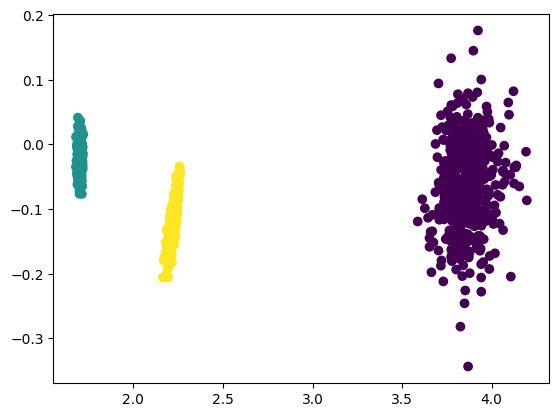

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
#criando a lista
x=[]
y=[]
classes=[]
for i in range(500):
  Sw=nx.watts_strogatz_graph(100,5,0.3)
  Er=nx.erdos_renyi_graph(100,0.3)
  Ba=nx.barabasi_albert_graph(100,5)
  # grafos Sw
  x.append(nx.average_shortest_path_length(Sw))
  y.append(nx.degree_pearson_correlation_coefficient(Sw))
  classes.append(0)
  # grafos Er
  x.append(nx.average_shortest_path_length(Er))
  y.append(nx.degree_pearson_correlation_coefficient(Er))
  classes.append(1)
  # grafos Ba
  x.append(nx.average_shortest_path_length(Ba))
  y.append(nx.degree_pearson_correlation_coefficient(Ba))
  classes.append(2)

knn = KNeighborsClassifier(n_neighbors=10)
data = list(zip(x,y))
knn.fit(data,classes)

plt.scatter(x,y,c=classes)
plt.show()

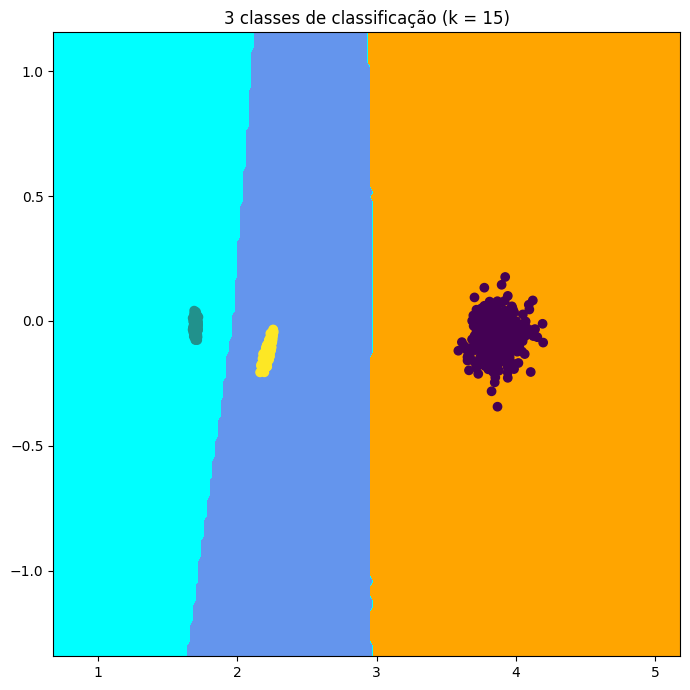

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

plt.rcParams["figure.figsize"] = [7.00, 7.0]
plt.rcParams["figure.autolayout"] = True

n_neighbors = 15
iris = datasets.load_iris()
ya = classes
h = .02

cmap_light = ListedColormap(['orange', 'cyan', 'cornflowerblue'])
cmap_bold = ['darkorange', 'c', 'darkblue']

clf = neighbors.KNeighborsClassifier(n_neighbors, weights='uniform')
data = list(zip(x,y))
#print(data)
clf.fit(data, ya)
x_min, x_max = min(x) - 1, max(x) + 1
y_min, y_max = min(y) - 1, max(y) + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure()

plt.contourf(xx, yy, Z, cmap=cmap_light)
#print(x,'\n')
#print(y,'\n')
plt.scatter(x,y,c=classes)

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.title("3 classes de classificação (k = %i)"
% (n_neighbors))

plt.show()

Final da apresentação
